# Ungraded Lab: Integrated Statistical Analysis and A/B Test Challenge

## Overview 
Welcome to your third analytical challenge with MediTrack Health Solutions! As the company continues to revolutionize healthcare management, your previous work analyzing patient demographics and billing patterns has revealed an exciting new opportunity.

The Clinical Effectiveness Team at MediTrack has noticed varying success rates and costs across different treatment approaches. They've approached you, their trusted data scientist, with a critical question: "Can we quantitatively determine which treatment approaches are most cost-effective while maintaining quality care?"

## Your Challenge 
MediTrack needs to:
- Compare the effectiveness and costs of different treatment approaches
- Determine if certain treatments are more cost-effective for specific conditions
- Provide statistical evidence to support treatment recommendations
- Create a repeatable analysis framework for future treatment comparisons

This analysis will help MediTrack:
- Optimize treatment recommendations
- Control healthcare costs while maintaining quality
- Support evidence-based decision making
- Guide insurance coverage policies

## Learning Outcomes 
By the end of this lab, you will be able to:
- Design and implement A/B tests for healthcare treatment comparison
- Apply statistical hypothesis testing to evaluate treatment effectiveness
- Create compelling visualizations of treatment outcomes
- Develop data-driven recommendations for clinical decision-making

## Dataset Information
Building on your previous work with MediTrack's integrated database, you'll focus on the medical_visits dataset, which now includes:
- Detailed treatment information
- Associated doctor fees
- Patient outcomes
- Visit date

This represents real-world data from MediTrack's network of healthcare providers, though anonymized for privacy.

## Activities
### Activity 1: Initial Data Investigation 
As MediTrack's data scientist, your first task is to understand the current treatment landscape.

<b>Step 1:</b> Load and prepare the dataset

In [1]:
# Import required libraries and load data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind
# Load the dataset
df = pd.read_excel('medical_visits_AB.xlsx')

<b>Tip:</b> Remember to apply the data cleaning standards you established in your previous MediTrack analyses.

<b>Step 2:</b> Explore treatment groups

In [2]:
# Examine treatment distribution
treatment_counts = df['treatment'].value_counts()
print(treatment_counts)

treatment
Observation    271
Therapy        243
Surgery        241
Vaccination    223
Medication     222
Name: count, dtype: int64


<b>Tip:</b> Check for missing values and outliers before proceeding with analysis

### Activity 2: Treatment Comparison Framework 
The Clinical Effectiveness Team needs a robust method to compare treatments.

<b>Step 1:</b> Define treatment groups for comparison

In [3]:
# Extract treatment groups
therapy_fees = df[df['treatment'] == 'Therapy']['doctor_fee']
surgery_fees = df[df['treatment'] == 'Surgery']['doctor_fee']

<b>Step 2:</b> Verify statistical assumptions

In [ ]:
# Check normality and equal variance
# YOUR CODE HERE


### Activity 3: Conducting the A/B Test 
<b>Step 1:</b> Perform hypothesis testing

In [ ]:
# Conduct t-test between treatment groups
# YOUR CODE HERE


<b>Step 2:</b> Visualize results

In [ ]:
# Create comparison visualization
# YOUR CODE HERE


## Success Checklist
- Created a reproducible analysis framework for MediTrack's treatment comparisons
- Established statistical validation of treatment effectiveness
- Generated clear visualizations for stakeholder presentations
- Documented methodology for future analyses

## Summary 
Your analysis will directly impact MediTrack's ability to recommend optimal treatments while controlling healthcare costs. The statistical framework you've developed will serve as a foundation for future treatment comparisons across the organization.

### Key Points
- Evidence-based treatment comparison methodology
- Cost-effectiveness analysis framework
- Statistical validation of treatment recommendations
- Clear communication of results to stakeholders

## Solution Code
Stuck on your code or want to check your solution? Here's a complete reference implementation to guide you. This represents just one effective approach—try solving independently first, then use this to overcome obstacles or compare techniques. The solution is provided to help you move forward and explore alternative approaches to achieve the same results. Happy coding!

### Activity 1: Initial Data Investigation - Solution Code

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind
# Load and prepare data
df = pd.read_excel('medical_visits_AB.xlsx')

# Examine data structure
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Treatment distribution
print("\nTreatment Distribution:")
print(df['treatment'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   visit_id    1200 non-null   int64         
 1   patient_id  1200 non-null   int64         
 2   visit_date  1140 non-null   datetime64[ns]
 3   diagnosis   950 non-null    object        
 4   treatment   1200 non-null   object        
 5   doctor_fee  1200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 56.4+ KB
None

Missing Values:
visit_id        0
patient_id      0
visit_date     60
diagnosis     250
treatment       0
doctor_fee      0
dtype: int64

Basic Statistics:
           visit_id   patient_id                     visit_date   doctor_fee
count   1200.000000  1200.000000                           1140  1200.000000
mean   20599.500000  1245.514167  2024-08-24 05:41:03.157894912   167.958050
min    20000.000000  

### Activity 2: Treatment Comparison Framework - Solution Code

In [5]:
def check_assumptions(group1, group2):
    """Check statistical assumptions for treatment comparison."""
    
    # Test for normality
    _, p_norm1 = shapiro(group1)
    _, p_norm2 = shapiro(group2)
    normality_met = (p_norm1 > 0.05) and (p_norm2 > 0.05)
    
    # Test for equal variance
    _, p_var = levene(group1, group2)
    equal_variance = p_var > 0.05
    
    results = {
        'normality_met': normality_met,
        'equal_variance': equal_variance,
        'parametric_appropriate': normality_met and equal_variance
    }
    
    return results

# Extract treatment groups
therapy_group = df[df['treatment'] == 'Therapy']['doctor_fee']
surgery_group = df[df['treatment'] == 'Surgery']['doctor_fee']

# Check assumptions
assumptions = check_assumptions(therapy_group, surgery_group)
print("Statistical Assumptions Check:")
print(assumptions)

Statistical Assumptions Check:
{'normality_met': True, 'equal_variance': False, 'parametric_appropriate': False}


### Activity 3: Conducting the A/B Test - Solution Code

In [6]:
def perform_statistical_test(group1, group2, assumptions_met=True):
    """Conduct appropriate statistical test based on assumptions."""
    
    if assumptions_met:
        # Use Student's t-test (assumes equal variances)
        stat, p_value = ttest_ind(group1, group2)
        test_type = "Student's t-test (equal_var=True)"
    else:
        # Use Welch's t-test (does not assume equal variances)
        stat, p_value = ttest_ind(group1, group2, equal_var=False)
        test_type = "Welch’s t-test (equal_var=False)"
    
    return {
        'test_type': test_type,
        'statistic': stat,
        'p_value': p_value
    }

# Perform statistical test
test_results = perform_statistical_test(
    therapy_group,
    surgery_group,
    assumptions['parametric_appropriate']
)

print("\nStatistical Test Results:")
print(test_results)


Statistical Test Results:
{'test_type': 'Welch’s t-test (equal_var=False)', 'statistic': -55.65101028916769, 'p_value': 6.028932046942436e-187}


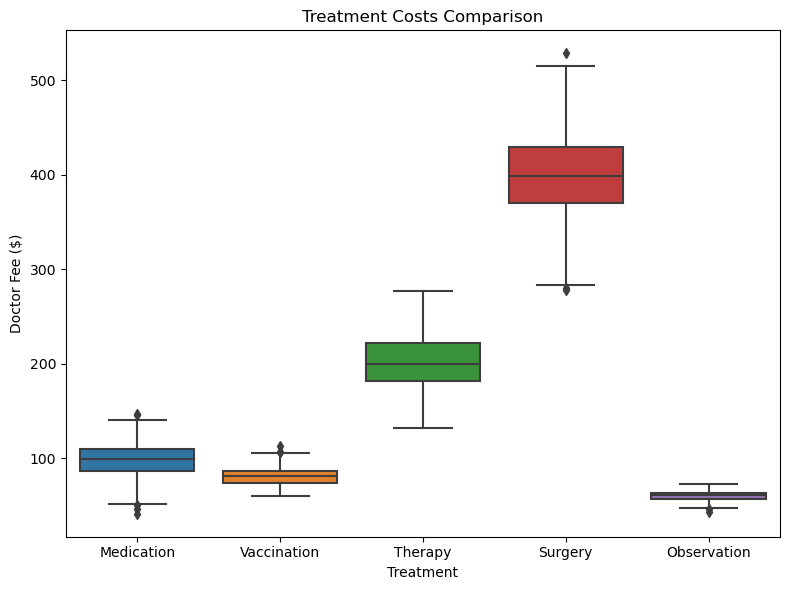

In [7]:
# Visualization of Results 

def visualize_results(df):
    """Create visualization for treatment comparison."""
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='treatment', y='doctor_fee', data=df)
    plt.title('Treatment Costs Comparison')
    plt.ylabel('Doctor Fee ($)')
    plt.xlabel('Treatment')
    plt.tight_layout()
    plt.show()

# Create visualization
visualize_results(df)